#### Importing the required Libraries

In [421]:
X_test.loc[1856].values.reshape(1,-1)

array([[  4.   , 103.   ,  60.   ,  24.   ,   0.966,  33.   ]])

In [465]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import mean_squared_error

#### Importing and displaying the data

In [148]:
data=pd.read_csv('diabetes.csv')

In [149]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [134]:
data.shape

(2000, 9)

Here we can see that there are 2000rows and 9 columns(features) namely:
1. Pregnancies-Number of times pregnant
2. Glucose-Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. BloodPressure: Diastolic blood pressure (mm Hg)
4. SkinThickness: Triceps skin fold thickness (mm)
5. Insulin: 2-Hour serum insulin (mu U/ml)
6. BMI: Body mass index (weight in kg/(height in m)^2)
7. DiabetesPedigreeFunction: Diabetes pedigree function
8. Age: Age (years)
9. Outcome: Class variable (0 or 1)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


There are no 'Nan' values present in the dataset

In [6]:
data.describe().T #Here T denotes Transpose

,count,mean,std,min,25%,50%,75%,max
Pregnancies,2000.0,3.70350,3.306063,0.000,1.000,3.000,6.000,17.00
Glucose,2000.0,121.18250,32.068636,0.000,99.000,117.000,141.000,199.00
BloodPressure,2000.0,69.14550,19.188315,0.000,63.500,72.000,80.000,122.00
SkinThickness,2000.0,20.93500,16.103243,0.000,0.000,23.000,32.000,110.00
Insulin,2000.0,80.25400,111.180534,0.000,0.000,40.000,130.000,744.00
BMI,2000.0,32.19300,8.149901,0.000,27.375,32.300,36.800,80.60
DiabetesPedigreeFunction,2000.0,0.47093,0.323553,0.078,0.244,0.376,0.624,2.42
Age,2000.0,33.09050,11.786423,21.000,24.000,29.000,40.000,81.00
Outcome,2000.0,0.34200,0.474498,0.000,0.000,0.000,1.000,1.00


#### Exploratory Data Analysis(EDA)

1. First we will diplay the outcome column

The non-diabetic patients are 1316
The diabetic patients are 684


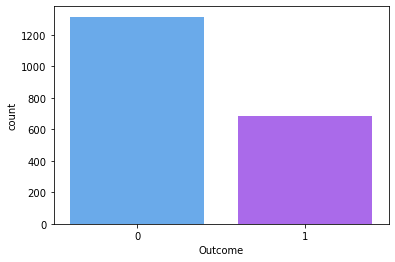

In [7]:
sns.countplot(data=data,x='Outcome',palette='cool')
nd,d=data['Outcome'].value_counts()
print('The non-diabetic patients are {}'.format(nd))
print('The diabetic patients are {}'.format(d))

Now let us check Pregnancies column

In [8]:
data.Pregnancies.value_counts()

1     356
0     301
2     284
3     195
4     191
5     141
6     131
7     100
8      96
9      70
10     54
11     24
12     23
13     22
14      7
17      3
15      2
Name: Pregnancies, dtype: int64

Here we can see that Pregnancies from 8 onwards are small in number as compared to total dataset, therefore we can merge them where Pregnancies are 8

In [9]:
for i in range(len(data.Pregnancies)):
    if(data.Pregnancies[i]>7):
        data.Pregnancies[i]=8
    else:
        pass        

C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
data.Pregnancies.value_counts()

1    356
8    301
0    301
2    284
3    195
4    191
5    141
6    131
7    100
Name: Pregnancies, dtype: int64

All Other features are continuous variables therefore no need to check them

The non-diabetic patients are 1316
The diabetic patients are 684


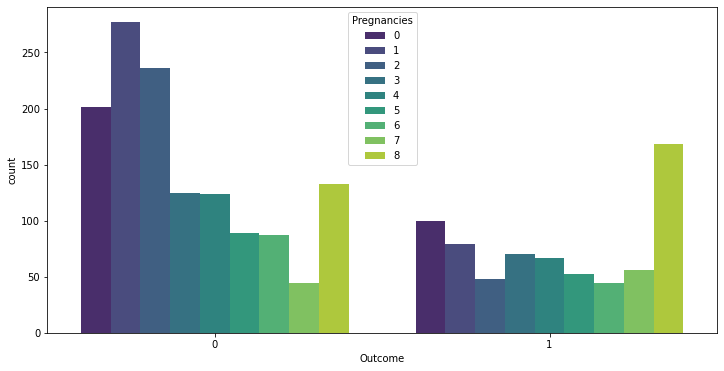

In [11]:
plt.figure(figsize=(12,6))
sns.countplot(data=data,x='Outcome',palette='viridis',hue='Pregnancies')
nd,d=data['Outcome'].value_counts()
print('The non-diabetic patients are {}'.format(nd))
print('The diabetic patients are {}'.format(d))

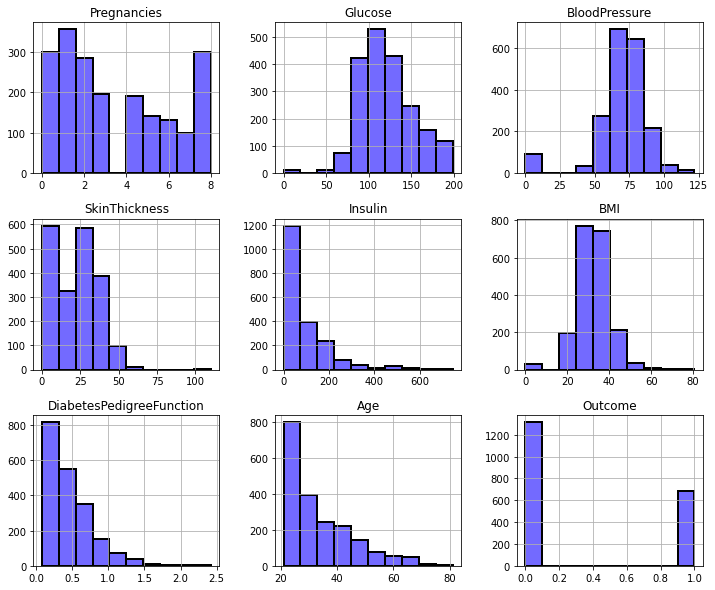

In [12]:
data.hist(figsize=(12,10),color='#736AFF',edgecolor='black',linewidth=2);

<AxesSubplot:xlabel='Pregnancies', ylabel='count'>

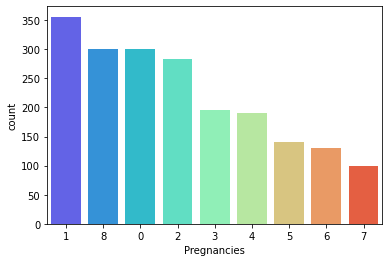

In [74]:
sns.countplot(x='Pregnancies',data=data,order=data.Pregnancies.value_counts().index,palette='rainbow')

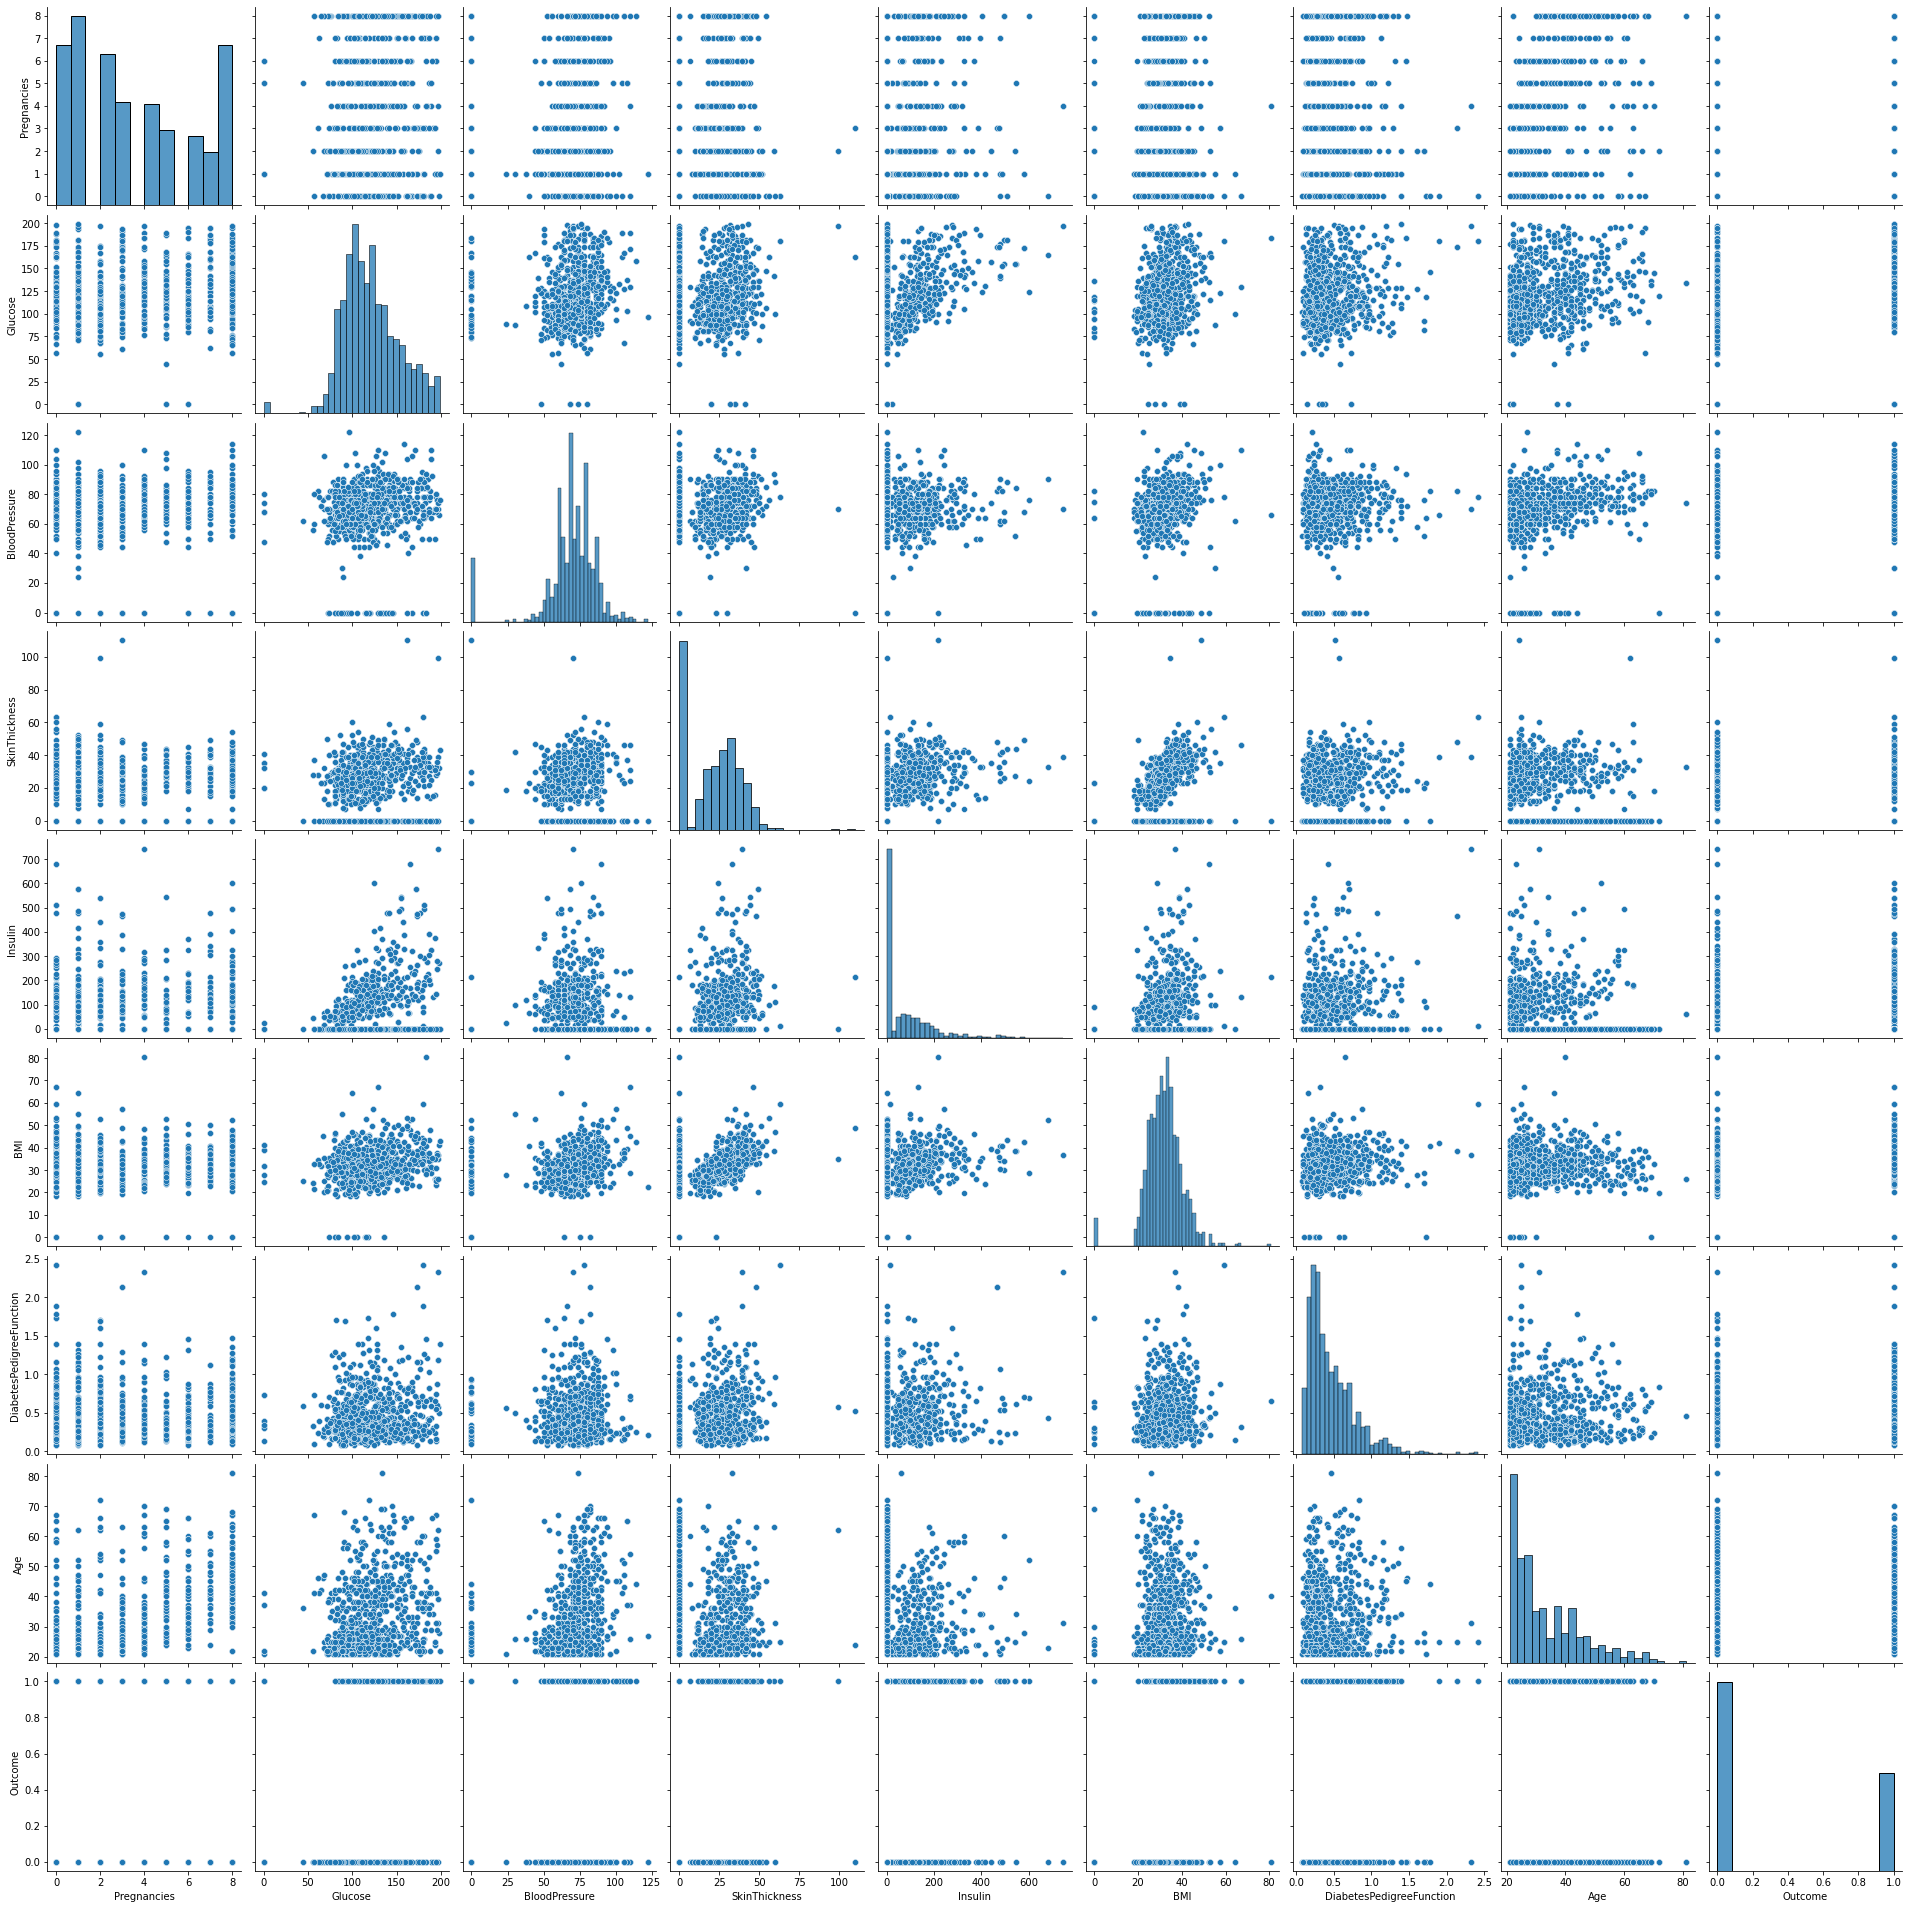

In [82]:
sns.pairplot(data=data,height=3)

<AxesSubplot:>

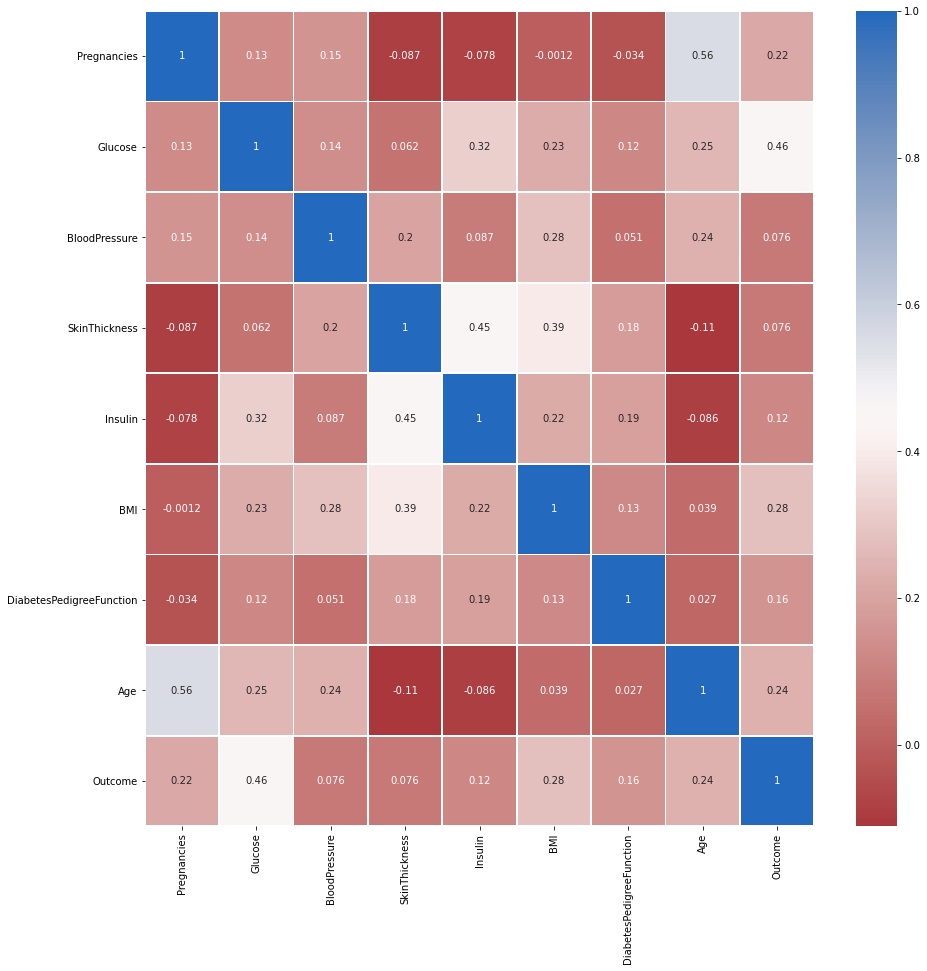

In [104]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),annot=True,linewidths=1,linecolor='white',cmap='vlag_r')

#### Model Building

In [105]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [150]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [151]:
a=len(data[data['SkinThickness']==0])
b=len(data[data['Insulin']==0])
print('The zero values in SkinThickness are {}'.format(a))
print('The zero values in Insulin are {}'.format(b))

The zero values in SkinThickness are 573
The zero values in Insulin are 956


Note:-Here dropping so many zero values will hugely affect the data(956 rows are almost 50% of the data), therefore we can drop both these columns

In [152]:
data.drop(['SkinThickness','Insulin'],axis=1,inplace=True)

In [153]:
data.head()

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,33.6,0.127,47,1
1,0,84,82,38.2,0.233,23,0
2,0,145,0,44.2,0.630,31,1
3,0,135,68,42.3,0.365,24,1
4,1,139,62,40.7,0.536,21,0


In [154]:
c=len(data[data['Glucose']==0])
d=len(data[data['BloodPressure']==0])
e=len(data[data['BMI']==0])
f=len(data[data['DiabetesPedigreeFunction']==0])
print('The zero values in Glucose are {}'.format(c))
print('The zero values in BloodPressure are {}'.format(d))
print('The zero values in BMI are {}'.format(e))
print('The zero values in DiabetesPedigreeFunction are {}'.format(f))

The zero values in Glucose are 13
The zero values in BloodPressure are 90
The zero values in BMI are 28
The zero values in DiabetesPedigreeFunction are 0


These zero values can be replaced my mean of the respective column

In [155]:
data['Glucose']=data.Glucose.replace(0,data['Glucose'].mean())
data['BloodPressure']=data.BloodPressure.replace(0,data['BloodPressure'].mean())
data['BMI']=data.BMI.replace(0,data['BMI'].mean())

In [156]:
data.head()

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138.0,62.0000,33.6,0.127,47,1
1,0,84.0,82.0000,38.2,0.233,23,0
2,0,145.0,69.1455,44.2,0.630,31,1
3,0,135.0,68.0000,42.3,0.365,24,1
4,1,139.0,62.0000,40.7,0.536,21,0


###### Now, the above data is ready to be trained and tested!!

In [157]:
X=data.drop('Outcome',axis=1)
y=data.Outcome

In [158]:
X.head()

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age
0,2,138.0,62.0000,33.6,0.127,47
1,0,84.0,82.0000,38.2,0.233,23
2,0,145.0,69.1455,44.2,0.630,31
3,0,135.0,68.0000,42.3,0.365,24
4,1,139.0,62.0000,40.7,0.536,21


In [159]:
y.head()

0    1
1    0
2    1
3    1
4    0
Name: Outcome, dtype: int64

In [160]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=30)

In [161]:
print('The shape of X_train is {}'.format(X_train.shape))
print('The shape of X_test is {}'.format(X_test.shape))
print('The shape of y_train is {}'.format(y_train.shape))
print('The shape of y_test is {}'.format(y_test.shape))

The shape of X_train is (1600, 6)
The shape of X_test is (400, 6)
The shape of y_train is (1600,)
The shape of y_test is (400,)


### LINEAR REGRESSION

In [162]:
from sklearn.linear_model import LinearRegression

In [163]:
lm=LinearRegression()

In [164]:
lm.fit(X_train,y_train)

LinearRegression()

In [184]:
lm_pred=lm.predict(X_test)

In [185]:
y_test

1856    0
364     0
1948    0
1458    1
609     0
       ..
1163    1
572     0
1105    1
1903    0
481     0
Name: Outcome, Length: 400, dtype: int64

In [186]:
accuracy_score(y_test,lm_pred.round())

0.7325

In [176]:
293/400

0.7325

In [187]:
print(classification_report(y_test,lm_pred.round()))

              precision    recall  f1-score   support

           0       0.77      0.85      0.81       266
           1       0.62      0.51      0.56       134

    accuracy                           0.73       400
   macro avg       0.70      0.68      0.68       400
weighted avg       0.72      0.73      0.72       400



In [188]:
print(confusion_matrix(y_test,lm_pred.round()))

[[225  41]
 [ 66  68]]


In [201]:
print('THE ACCURACY OF LINEAR MODEL IS {}%'.format((225+68)/(225+41+66+68)*100))

THE ACCURACY OF LINEAR MODEL IS 73.25%


In [567]:
print(lm.score(X_train, y_train)*100)

32.24144992809585


### LOGISTIC REGRESSION

In [181]:
from sklearn.linear_model import LogisticRegression

In [182]:
lr=LogisticRegression()

In [183]:
lr.fit(X_train,y_train)

LogisticRegression()

In [190]:
lr_pred=lr.predict(X_test)

In [191]:
y_test

1856    0
364     0
1948    0
1458    1
609     0
       ..
1163    1
572     0
1105    1
1903    0
481     0
Name: Outcome, Length: 400, dtype: int64

In [192]:
lr_pred

array([0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,

In [193]:
print(accuracy_score(y_test,lr_pred))

0.73


In [194]:
print(classification_report(y_test,lr_pred))

              precision    recall  f1-score   support

           0       0.77      0.84      0.81       266
           1       0.62      0.51      0.56       134

    accuracy                           0.73       400
   macro avg       0.70      0.67      0.68       400
weighted avg       0.72      0.73      0.72       400



In [195]:
print(confusion_matrix(y_test,lr_pred))

[[224  42]
 [ 66  68]]


In [430]:
print('THE ACCURACY OF LOGISTIC MODEL IS {}%'.format(accuracy_score(y_test,lr_pred)*100))

THE ACCURACY OF LOGISTIC MODEL IS 73.0%


#### Now we will tune the logistic regression in search of a better accuracy using GridSearchCV

In [398]:
from sklearn.model_selection import GridSearchCV
  
param_grid = [
    {
    'C' : [0.001,0.001,0.01,0.1,1]}
]
    
# Instantiating the GridSearchCV object
lr_cv = GridSearchCV(lr, param_grid, cv = 10)

In [399]:
lr_cv.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid=[{'C': [0.001, 0.001, 0.01, 0.1, 1]}])

In [400]:
lr_pred2=lr_cv.predict(X_test)

In [424]:
print('THE ACCURACY OF LOGISTIC MODEL AFTER HYPER PARAMETER TUNING IS {}%'.format(accuracy_score(y_test,lr_pred2)*100))

THE ACCURACY OF LOGISTIC MODEL AFTER HYPER PARAMETER TUNING IS 74.25%


In [489]:
print("Train Accuracy:",lr_cv.score(X_train, y_train)*100)
print("Test Accuracy:",lr_cv.score(X_test, y_test)*100)

Train Accuracy: 78.0625
Test Accuracy: 74.25


###### Here we can see that the training and validation accuracies are close and the difference is less than 5%, so we can say that there is no chance of overfitting.

### DECISION TREE CLASSIFIER

In [437]:
from sklearn.tree import DecisionTreeClassifier

In [438]:
dtree=DecisionTreeClassifier()

In [439]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [440]:
dtree_pred=dtree.predict(X_test)

In [444]:
print(accuracy_score(y_test,dtree_pred,normalize=False))

391


In [445]:
print(confusion_matrix(y_test,dtree_pred))

[[264   2]
 [  7 127]]


In [446]:
print(classification_report(y_test,dtree_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       266
           1       0.98      0.95      0.97       134

    accuracy                           0.98       400
   macro avg       0.98      0.97      0.97       400
weighted avg       0.98      0.98      0.98       400



In [480]:
print('THE ACCURACY OF DECISION TREE MODEL IS {}%'.format(accuracy_score(y_test,dtree_pred)*100))

THE ACCURACY OF DECISION TREE MODEL IS 97.75%


The accuracy is quite high, therefore we need to check if there is an overfitting or not!!

In [488]:
print("Train Accuracy:",dtree.score(X_train, y_train)*100)
print("Test Accuracy:",dtree.score(X_test, y_test)*100)

Train Accuracy: 100.0
Test Accuracy: 97.75


###### As mentioned above, the difference is less that 5%, so no overfitting!!

### RANDOM FOREST CLASSIFIER

In [496]:
from sklearn.ensemble import RandomForestClassifier

In [497]:
rf=RandomForestClassifier()

In [498]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [499]:
rf_pred=rf.predict(X_test)

In [500]:
print(accuracy_score(y_test,rf_pred))

0.9825


In [501]:
print("Train Accuracy:",rf.score(X_train, y_train)*100)
print("Test Accuracy:",rf.score(X_test, y_test)*100)

Train Accuracy: 100.0
Test Accuracy: 98.25


###### We can see that the model is performing equally well on both training and validation data sets

In [502]:
print(confusion_matrix(y_test,rf_pred))

[[264   2]
 [  5 129]]


In [503]:
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       266
           1       0.98      0.96      0.97       134

    accuracy                           0.98       400
   macro avg       0.98      0.98      0.98       400
weighted avg       0.98      0.98      0.98       400



In [521]:
print('THE ACCURACY OF RANDOM FOREST MODEL IS {}%'.format(accuracy_score(y_test,rf_pred)*100))

THE ACCURACY OF RANDOM FOREST MODEL IS 98.25%


-------------------------------------------------------------------------------------------------------------------------------

In [582]:
data={
    
    'Model':['Linear Regression','Logistic Regression','Decision Tree Classifier','Random Forest Classifier'],
    'Testing Accuracy':[lm.score(X_test, y_test)*100,lr_cv.score(X_test, y_test)*100,dtree.score(X_test, y_test)*100,
         rf.score(X_test, y_test)*100],
    'Training Accuracy':[lm.score(X_train, y_train)*100,lr_cv.score(X_train, y_train)*100,dtree.score(X_train, y_train)*100,
         rf.score(X_train, y_train)*100]
}
acc=df=pd.DataFrame(data=data)
acc.sort_values(by='Testing Accuracy',ascending=False)

,Model,Testing Accuracy,Training Accuracy
3,Random Forest Classifier,98.250000,100.00000
2,Decision Tree Classifier,97.750000,100.00000
1,Logistic Regression,74.250000,78.06250
0,Linear Regression,23.135353,32.24145


##### Here are two best performing models are Decision Tree and Random Forest Classifiers. Therefore we can calculate the AUC and plot ROC for a better visualization

AUC - ROC(receiver operating characteristic curve) curve is a performance measurement for the classification problems at various threshold settings. ROC is a probability curve and AUC represents the degree or measure of separability. It tells how much the model is capable of distinguishing between classes. Higher the value of AUC(area under the curve), better will be the performance of our model

In [528]:
from sklearn.metrics import roc_curve, roc_auc_score

###### For Decision Tree

In [542]:
print('The Area under the curve of Decision Tree model is {}'.format(round(roc_auc_score(y_test, dtree_pred)*100)))

The Area under the curve of Decision Tree model is 97


In [540]:
fpr, tpr,_= roc_curve(y_test, dtree_pred)

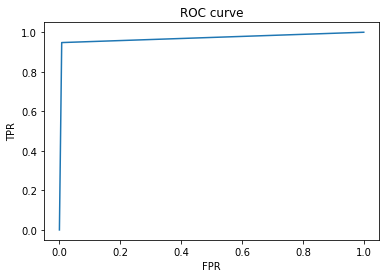

In [544]:
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve');

###### For Random Forest

In [546]:
print('The Area under the curve of Random Forest model is {}'.format(round(roc_auc_score(y_test, rf_pred)*100)))

The Area under the curve of Random Forest model is 98


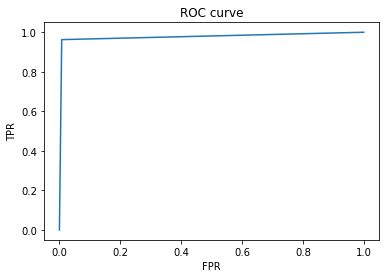

In [547]:
fpr, tpr, _ = roc_curve(y_test, rf_pred)

plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve');

The Random Forest has a slight edge over the Decision Tree model, Therefore we would be selecting Random Forest Classifier for our problem Statement

#### Saving Our Model

In [585]:
import pickle

file_diabetes=open('rf_diabetes.pkl','wb')

pickle.dump(rf,file_diabetes)

In [587]:
model = open('rf_diabetes.pkl','rb')
check = pickle.load(model)

In [588]:
var=check.predict(X_test)

In [589]:
print(accuracy_score(y_test,var))

0.9825
